In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_train=pd.read_csv("C://Users//satya//Documents//Prodigy_InfoTech//House_Price_Prediction_01//Datasets//train.csv")

In [3]:
for col in df_train.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [4]:
df_train.shape

(1460, 81)

In [5]:
#determine the number of categorical data and numerical

cat_var = df_train.select_dtypes(include = ["object"]).columns
num_var = df_train.select_dtypes(exclude = ["object"]).columns
num_var = num_var.drop("SalePrice")
print("Numerical variables : " + str(len(num_var)))
print("Categorical variables : " + str(len(cat_var)))


Numerical variables : 37
Categorical variables : 43


In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
#check if there are any null values in saleprice
df_train['SalePrice'].isna().sum()

0

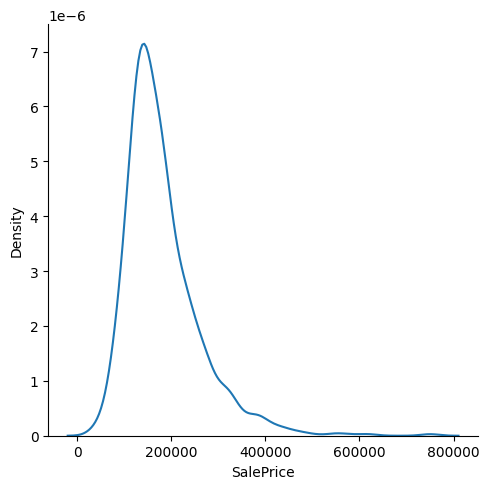

In [8]:
sns.displot(df_train['SalePrice'], kind='kde')

In [9]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [10]:
missing =df_train.isnull().sum().sort_values(ascending=False)
total = df_train.isnull().count().sort_values(ascending=False)
NotNull =(total - missing).sort_values(ascending=True)
percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([NotNull, missing, total, percent], axis=1, keys=['NotNull ', 'Missing', 'total', 'Percent'])
missing_data.head(20)

,NotNull,Missing,total,Percent
PoolQC,7,1453,1460,99.520548
MiscFeature,54,1406,1460,96.301370
Alley,91,1369,1460,93.767123
Fence,281,1179,1460,80.753425
MasVnrType,588,872,1460,59.726027
FireplaceQu,770,690,1460,47.260274
LotFrontage,1201,259,1460,17.739726
GarageCond,1379,81,1460,5.547945
GarageFinish,1379,81,1460,5.547945
GarageQual,1379,81,1460,5.547945


In [11]:
df0=missing_data.head(7)
col = df0.index
df1 = df_train.drop(col, axis=1)

In [12]:
cat_var = df1.select_dtypes(exclude=np.number).columns
num_var = df1.select_dtypes(include=np.number).columns

df_num=df_train[num_var]
df_cat=df_train[cat_var]



In [13]:
df_num = df_num.drop(['Id'], axis =1)

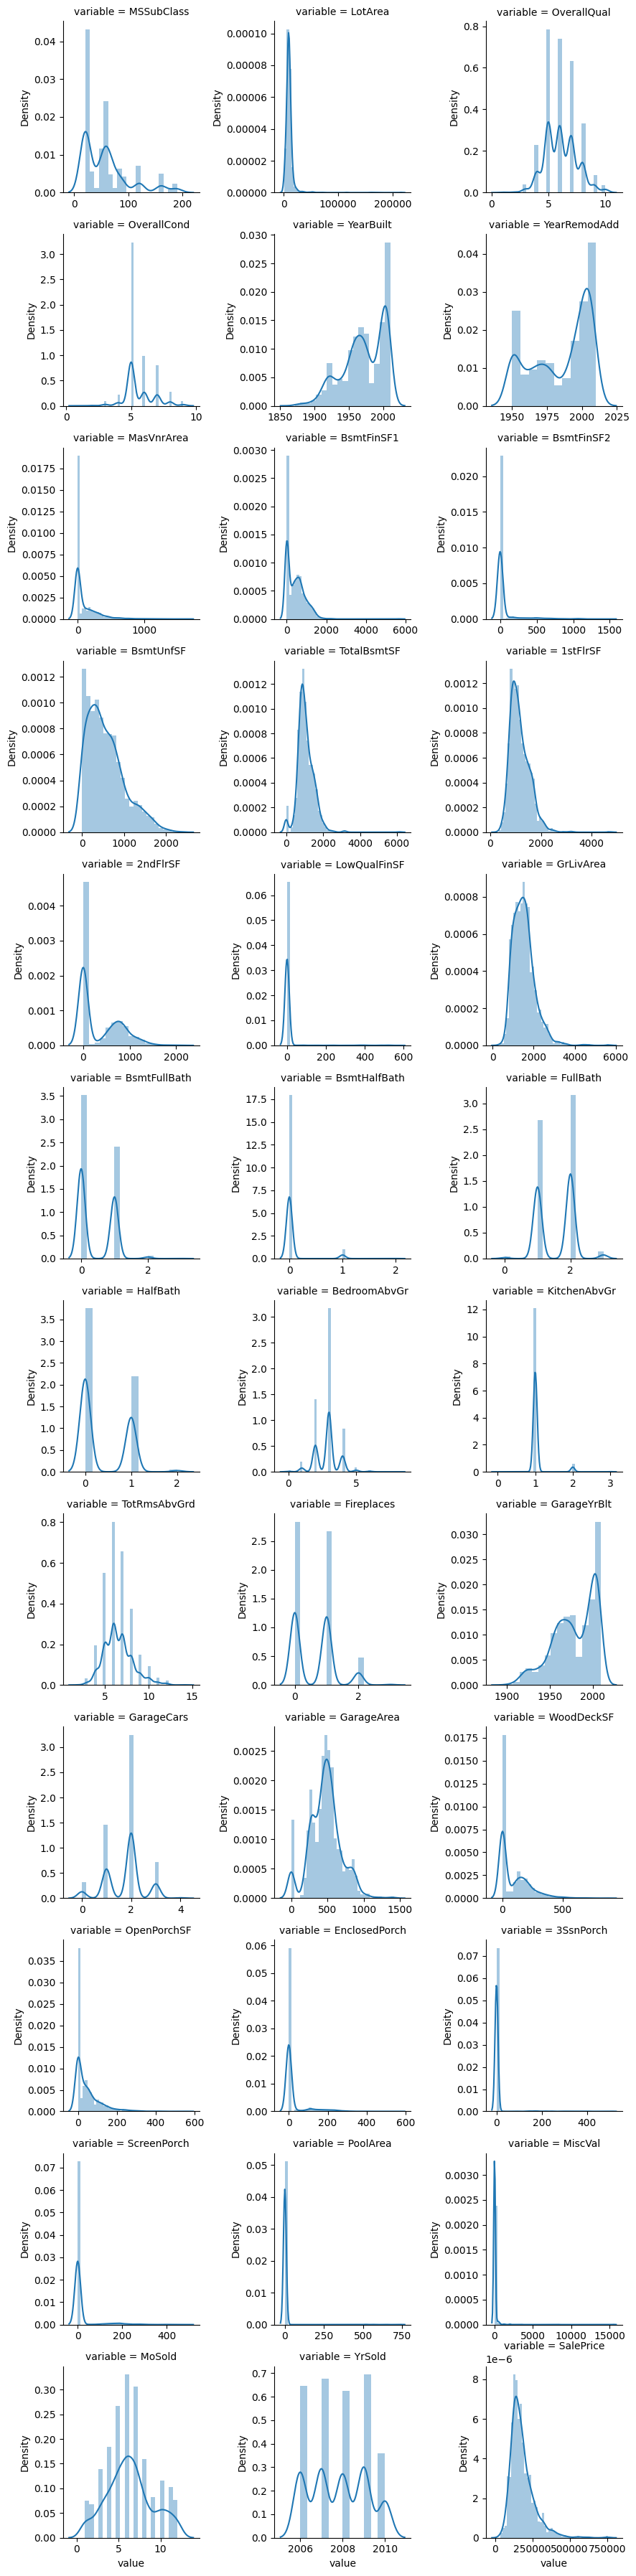

In [14]:
#numerical variables 

f = pd.melt(df_num)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [15]:
#pick variables by degree of correlation
corr = df_num.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [16]:
corrS= df_num.corr(method='spearman')
corrS.sort_values(['SalePrice'], ascending=False, inplace=True)
corrS.SalePrice.head(30)

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.421309
WoodDeckSF      0.353802
HalfBath        0.343008
BsmtFinSF1      0.301871
2ndFlrSF        0.293598
BedroomAbvGr    0.234907
BsmtFullBath    0.225125
BsmtUnfSF       0.185197
ScreenPorch     0.100070
MoSold          0.069432
3SsnPorch       0.065440
PoolArea        0.058453
MSSubClass      0.007192
BsmtHalfBath   -0.012189
YrSold         -0.029899
Name: SalePrice, dtype: float64

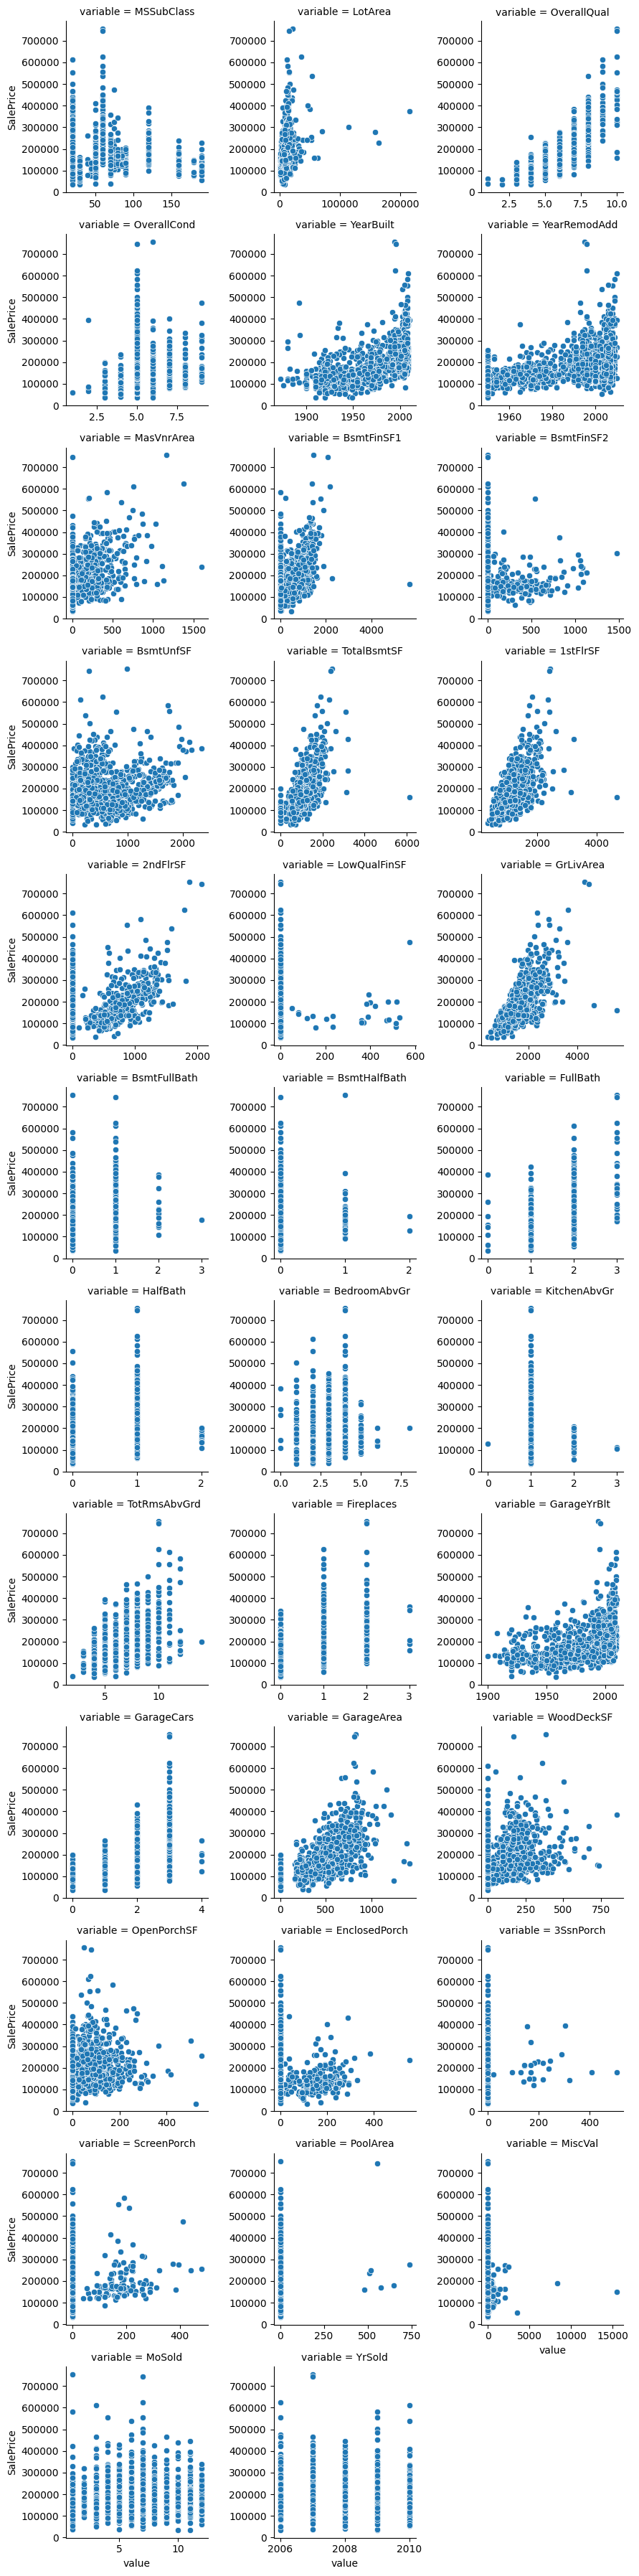

In [17]:
f = pd.melt(df_num, id_vars=['SalePrice'], value_vars=df_num.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.scatterplot, "value",  "SalePrice")

In [18]:
#checking for missing values
df_num.isna().sum()

MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [19]:
#replace missing values with median 

df_num['GarageYrBlt']=df_num['GarageYrBlt'].fillna(df_num['GarageYrBlt'].median())
df_num['MasVnrArea']=df_num['MasVnrArea'].fillna(df_num['MasVnrArea'].median())

In [20]:
df_num.shape

(1460, 36)

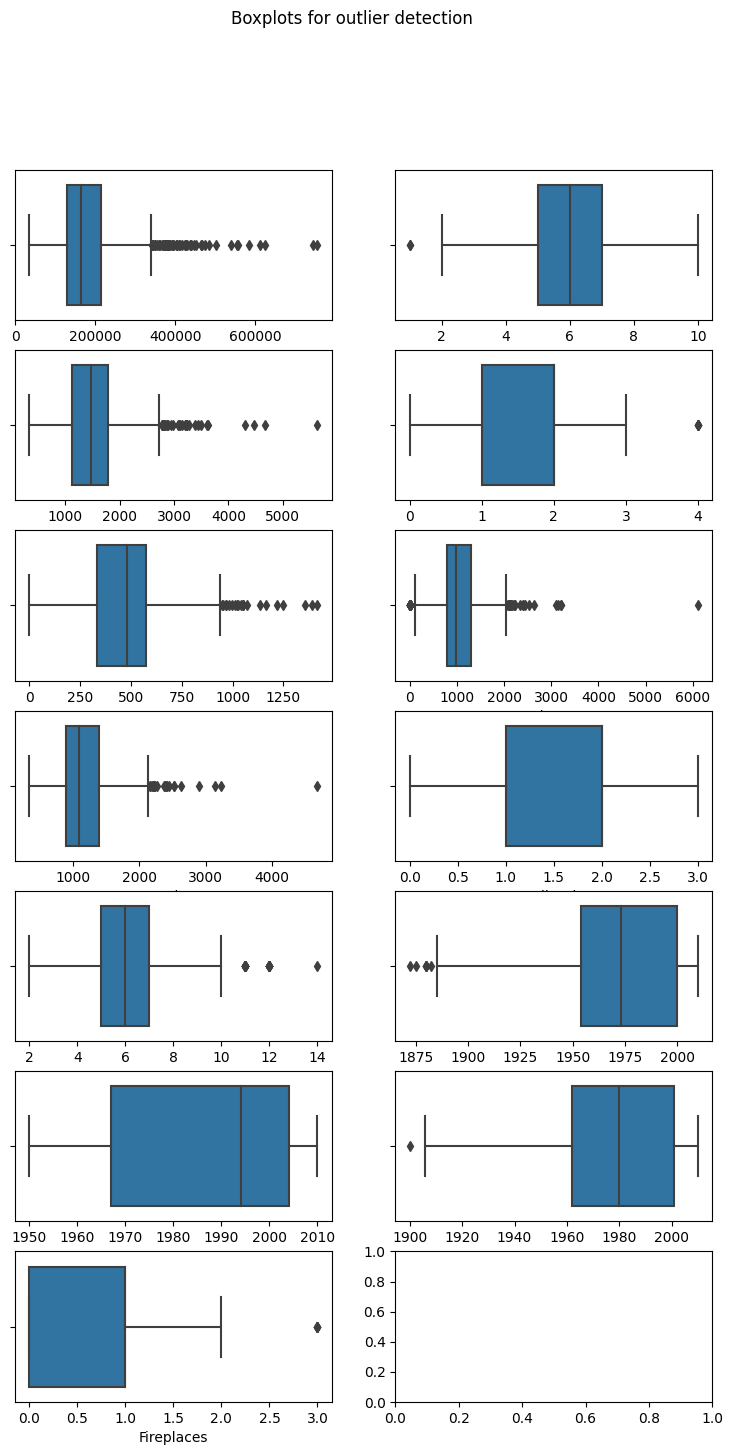

In [21]:
fig, axes = plt.subplots(7, 2, figsize=(9, 16))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=df_num['SalePrice'])
sns.boxplot(ax=axes[0,1], x=df_num['OverallQual'])
sns.boxplot(ax=axes[1,0], x=df_num['GrLivArea'])
sns.boxplot(ax=axes[1,1], x=df_num['GarageCars'])
sns.boxplot(ax=axes[2,0], x=df_num['GarageArea'])
sns.boxplot(ax=axes[2,1], x=df_num['TotalBsmtSF'])
sns.boxplot(ax=axes[3,0], x=df_num['1stFlrSF'])
sns.boxplot(ax=axes[3,1], x=df_num['FullBath'])
sns.boxplot(ax=axes[4,0], x=df_num['TotRmsAbvGrd'])
sns.boxplot(ax=axes[4,1], x=df_num['YearBuilt'])
sns.boxplot(ax=axes[5,0], x=df_num['YearRemodAdd'])
sns.boxplot(ax=axes[5,1], x=df_num['GarageYrBlt'])
sns.boxplot(ax=axes[6,0], x=df_num['Fireplaces'])
plt.show();

In [22]:
def outlier_imputer(column_list, iqr_factor):
    
    for col in column_list:
        # Reassign minimum to zero
        df_num.loc[df_num[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df_num[col].quantile(0.25)
        q3 = df_num[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df_num.loc[df_num[col] > upper_threshold, col] = upper_threshold
        print(df_num[col].describe())
        print()

In [23]:
outlier_imputer(['SalePrice'], 4.5)

SalePrice
q3: 214000.0
upper_threshold: 592112.5
count      1460.000000
mean     180668.999315
std       77899.255428
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      592112.500000
Name: SalePrice, dtype: float64



In [24]:
df_num.skew(axis=0)

MSSubClass        1.407657
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.632035
dtype: float64

In [25]:
skewness = df_num.skew(axis=0)
skewness = skewness[abs(skewness) > 0.5 ]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_num[skewed_features] = np.log1p(df_num[skewed_features])

29 skewed numerical features to log transform


In [26]:
df_cat.shape

(1460, 37)

In [27]:
df_cat = pd.concat([df_cat, df_num['SalePrice']], axis=1)

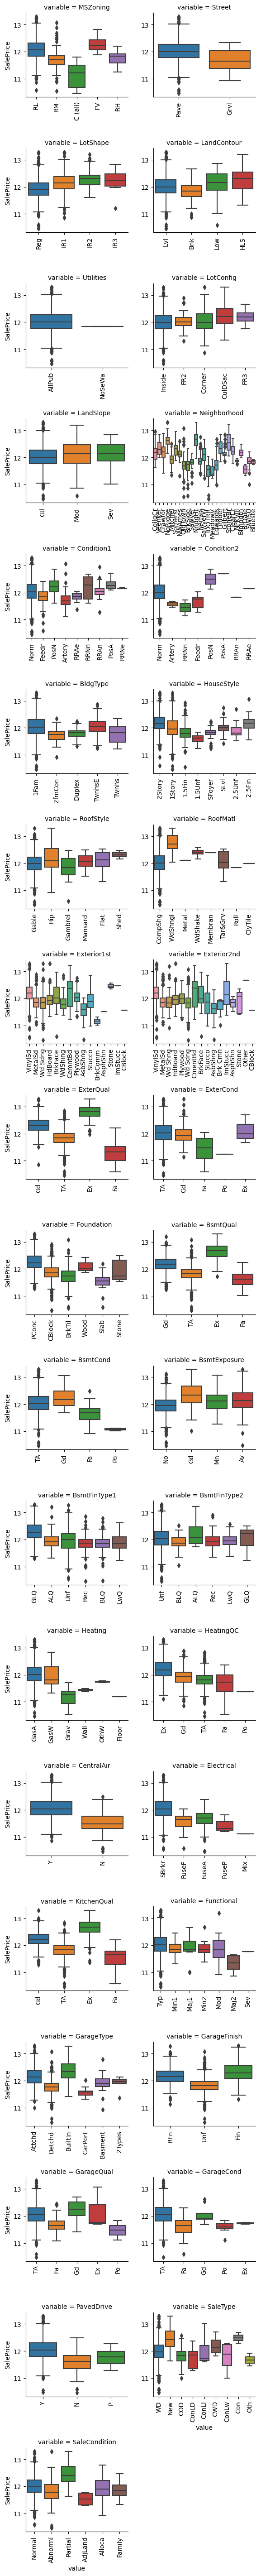

In [28]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_cat, id_vars=['SalePrice'], value_vars=df_cat)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")

In [29]:
from scipy.stats import f_oneway
def ANOVA_Test(df, feature):
    category_groups = df.groupby(feature)['SalePrice'].apply(list)
    return f_oneway(*category_groups)

In [30]:
p_vals = {}
for col in df_cat.columns:
    p_vals[col] = ANOVA_Test(df_cat, col).statistic
p_vals.pop('SalePrice')

inf

In [31]:
sorted(p_vals, key=p_vals.get, reverse=True)[:10]

['ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageFinish',
 'CentralAir',
 'Foundation',
 'HeatingQC',
 'GarageType',
 'Neighborhood',
 'MSZoning']

In [32]:
df_cat=df_cat.drop('SalePrice', axis=1)

In [33]:
purge1=corrS.SalePrice.head(20).index

purge2=sorted(p_vals, key=p_vals.get, reverse=True)[:10]

df2_cat= df_cat[purge2]
df2_num= df_num[purge1]


In [34]:
df = pd.concat([df2_cat, df2_num], axis=1)

In [35]:
df.shape

(1460, 30)

In [36]:
df2 = df.copy()

In [37]:
df2=pd.get_dummies(df2, drop_first=False)

In [38]:
y = df2['SalePrice']

X = df2.drop(['SalePrice'], axis=1)

In [39]:
#instantiate scaler
scaler = StandardScaler()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
lss=Lasso()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

parameters = {'alpha': (0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 10)}

grid_search = GridSearchCV(lss, parameters, n_jobs=-1, scoring='r2', cv=cv)

grid_search = grid_search.fit(X_train, y_train)
grid_search.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.943e-01, tolerance: 1.688e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.375e-02, tolerance: 1.701e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.513e-01, tolerance: 1.711e

Lasso(alpha=0.001)

In [42]:
y_pred_train = grid_search.best_estimator_.predict(X_train)
print('r2: %.3f' % grid_search.best_score_)
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Config: %s' % grid_search.best_params_)

r2: 0.899
MSE: 0.0138797184423426
RMSE: 0.11781221686371324
Config: {'alpha': 0.001}


In [43]:
#try on test subset
r_sq_test = grid_search.best_estimator_.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = grid_search.best_estimator_.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.837509714712765
R^2: 0.837509714712765
MSE: 0.024247984298692914
RMSE: 0.15571764286262785


In [44]:
table =({'model': 'Lr Reg',
                          'R2':0.84,
                          'RMSE': 0.16
                          },
                         )

champion =pd.DataFrame(table)
champion

,model,R2,RMSE
0,Lr Reg,0.84,0.16


In [45]:
poly = PolynomialFeatures(degree=2)
X_poly=  poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [46]:
cv1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)
grid_search = GridSearchCV(lss, parameters, n_jobs=-1, scoring='r2', cv=cv1)

grid_search = grid_search.fit(X_train, y_train)
grid_search.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.956e+00, tolerance: 1.701e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+00, tolerance: 1.690e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.962e+00, tolerance: 1.711e

Lasso(alpha=0.006)

In [47]:
y_pred_train = grid_search.best_estimator_.predict(X_train)

In [48]:
print('r2: %.3f' % grid_search.best_score_)
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Config: %s' % grid_search.best_params_)

r2: 0.881
MSE: 0.013331729812307661
RMSE: 0.11546311017943203
Config: {'alpha': 0.006}


In [49]:
r_sq_test = grid_search.best_estimator_.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = grid_search.best_estimator_.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8613441320878638
R^2: 0.8613441320878638
MSE: 0.02069123887690805
RMSE: 0.14384449546961486


In [50]:
poly_table =({'model': 'Pl Reg',
                          'R2':0.86,
                          'RMSE': 0.14
                          },
                         )
poly_result = pd.DataFrame(poly_table)

champion =  pd.concat([champion, poly_result], axis=0)
champion

,model,R2,RMSE
0,Lr Reg,0.84,0.16
0,Pl Reg,0.86,0.14


In [51]:
del df_train
df_train=pd.read_csv("C://Users//satya//Documents//Prodigy_InfoTech//House_Price_Prediction_01//Datasets//train.csv")

In [52]:
# PoolQC : data description says NA means no pool
df_train.loc[:, "PoolQC"] = df_train.loc[:, "PoolQC"].fillna("None")
# MiscFeature : NA most likely means no noteworthy feature
df_train.loc[:, "MiscFeature"] = df_train.loc[:, "MiscFeature"].fillna("None")
# Alley : NA most likely means no Alley
df_train.loc[:, "Alley"] = df_train.loc[:, "Alley"].fillna("None")
# No fence
df_train.loc[:, "Fence"] = df_train.loc[:, "Fence"].fillna("None")
# No veneer on masonry
df_train.loc[:, "MasVnrType"] = df_train.loc[:, "MasVnrType"].fillna("None")
# No fire place
df_train.loc[:, "FireplaceQu"] = df_train.loc[:, "FireplaceQu"].fillna("No")
# No frontage ft or m
df_train.loc[:, "LotFrontage"] = df_train.loc[:, "LotFrontage"].fillna(0)
# GarageType etc : data description says NA for garage features is "no garage"
df_train.loc[:, "GarageType"] = df_train.loc[:, "GarageType"].fillna("No")
df_train.loc[:, "GarageFinish"] = df_train.loc[:, "GarageFinish"].fillna("No")
df_train.loc[:, "GarageQual"] = df_train.loc[:, "GarageQual"].fillna("No")
df_train.loc[:, "GarageCond"] = df_train.loc[:, "GarageCond"].fillna("No")
df_train.loc[:, "GarageArea"] = df_train.loc[:, "GarageArea"].fillna(0)
df_train.loc[:, "GarageCars"] = df_train.loc[:, "GarageCars"].fillna(0)
df_train.loc[:, "GarageYrBlt"] = df_train.loc[:, "GarageYrBlt"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
df_train.loc[:, "BsmtQual"] = df_train.loc[:, "BsmtQual"].fillna("No")
df_train.loc[:, "BsmtCond"] = df_train.loc[:, "BsmtCond"].fillna("No")
df_train.loc[:, "BsmtExposure"] = df_train.loc[:, "BsmtExposure"].fillna("No")
df_train.loc[:, "BsmtFinType1"] = df_train.loc[:, "BsmtFinType1"].fillna("No")
df_train.loc[:, "BsmtFinType2"] = df_train.loc[:, "BsmtFinType2"].fillna("No")
# No veneer area
df_train.loc[:, "MasVnrArea"] = df_train.loc[:, "MasVnrArea"].fillna(0)
#misc feature value
df_train.loc[:, "MiscVal"] = df_train.loc[:, "MiscVal"].fillna(0)


# for electrical, there is no way to tell if it means that 
#there are no electrical works in the building, but the 
#utilities means that it possesses allpub, we will make it the mode later on 

In [53]:
df_train['PoolQC_B'] = np.where(df_train['PoolQC']=='None', 0, 1)

df_train['MiscFeature_B'] = np.where(df_train['MiscFeature']=='None', 0, 1)

df_train['Alley_B'] = np.where(df_train['Alley']=='None', 0, 1)

df_train['Fence_B'] = np.where(df_train['Fence']=='None', 0, 1)

df_train['MasVnrType_B'] = np.where(df_train['MasVnrType']=='None', 0, 1)

df_train['GarageQual_B'] = np.where(df_train['MasVnrType']=='No', 0, 1)

df_train['BsmtQual_B'] = np.where(df_train['MasVnrType']=='No', 0, 1)

In [54]:
df_train=df_train.replace({"MSZoning" : {"FV" : 4, "RL" : 3, 'RH': 2, 'RM':2, 'C(all)':1},
                       "LotConfig" : {"CulDSac" : 1, "FR3" : 1, "FR2" : 2, "Corner" : 2, "Inside" : 2},
                       "Neighborhood" : {"NridgHt" : 3, "NoRidge" : 3, "StoneBr": 3, "Timber" : 2,  "Somerst" : 2, "Veenker": 2, "Crawfor" : 2, "ClearCr" : 2, "CollgCr": 2, 
                                         "Blmngtn" : 2, "NWAmes" : 2, "Gilbert": 2, "SawyerW" : 2, "Mitchel" : 1, "NPkVill": 1, 
                                         "NAmes" : 1, "SWISU" : 1, "Blueste": 1, "Sawyer" : 1, "BrkSide" : 1, "Edwards": 1, "OldTown" : 1,
                                         "BrDale" : 1, "IDOTRR": 1, "MeadowV" : 1},
                       "Condition2" : {"PosA" : 3, "PosN" : 3, "RRAe": 2, "Norm" : 2, "RRAn" : 1, 
                                         "Feedr" : 1, "Artery" : 1, "RRNn" : 1},
                       "BsmtFinType2" : {"Unf" : 2, "LwQ": 2, "Rec" : 1, "BLQ" : 1, 
                                         "ALQ" : 2, "GLQ" : 3},
                       "BldgType" : {"TwnhsE" : 2, "1Fam" : 2, "Twnhs" : 1, "Duplex": 1, "2fmCon" : 1},
                       "Foundation" : {"PConc" : 3, "Wood" : 2, "CBlock": 2, "Stone": 2, "BrkTil": 2, "Slab" : 1},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA": 2, "Gd": 2, "Ex" : 3},
                       "SaleType" : {"Con" : 0, "New" : 1, "CWD" : 2, "WD": 3, "ConLw" : 4, "ConLD" : 5 ,
                                     "ConLI": 3, "COD" : 4, "Oth" : 5},
                       "SaleCondition" : {"Partial" : 1, "Normal" : 2, "Alloca": 3, "Family": 4, "Abnorml" : 5 , "AdjLand" : 5},
                       "CentralAir" : {"Y" : 2, "N" : 1},
                       "FireplaceQu" : {"No" : 1,"Po" : 1, "Fa" : 1, "TA" : 1, "Gd" : 1, "Ex" : 2},
                       "MasVnrType" : {"Stone" : 3, "BrkFace" : 2, "BrkCmn" : 1, "None" : 1},
                       "MiscFeature" : {"TenC" : 3, "Gar2" : 2, "None" : 2, "Shed" : 2, "Othr": 1},
                       "Electrical" : {"SBrkr" : 1, "FuseA" : 2, "FuseF" : 3, "FuseP" : 4, "Mixed": 5}}
                     )

In [55]:
df_train = df_train.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}}
                     )
                       

In [56]:
df_train["OverallScore"] = df_train["OverallQual"] * df_train["OverallCond"]

df_train["ExterScore"] = df_train["ExterQual"] * df_train["ExterCond"]

df_train["BsmtScore"] = df_train["BsmtQual"] * df_train["BsmtCond"]

df_train["FlrSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"]

df_train["GarageScore"] = df_train["GarageQual"] * df_train["GarageCond"]

df_train["LivSF"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]

df_train["Exteroverall"] = df_train["ExterQual"] * df_train["OverallCond"]

df_train["AddedScore"] = df_train["BsmtQual"] * df_train["GarageQual"]

In [57]:
# binning continuous variables into buckets based on quantiles
df_train['AgeBldg'] = pd.qcut(df_train['YearBuilt'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Ancient', 'Vintage', 'Old', 'Average', 'New'])

df_train['LastRemod']= 2010 - df_train['YearRemodAdd']

df_train['StateRemod'] = pd.qcut(df_train['LastRemod'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Critical', 'Due', 'Partial', 'Optimal', 'Newly Remod'])

df_train['LotFrontageRn'] = pd.qcut(df_train['LotFrontage'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Little', 'Fair', 'Adequate', 'Good', 'Excellent'])

df_train['LotAreaRn'] = pd.qcut(df_train['LotArea'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Little', 'Fair', 'Adequate', 'Good', 'Excellent'])


Qcut wouldnt work on MasVnrArea and MiscVal as a sizeable portion of the variable is zeros and there are almost the same number of record in each quantile. but the same values cannot fall in multiple bins. 

In [58]:
df_train['MasVnrCov']= pd.cut(df_train['MasVnrArea'], bins=[-1, 400, 800, 1200, 1601], 
                             labels=['Small', 'Sizeable', 'Optimal', 'Excellent'])

df_train['MiscValRn'] = pd.cut(df_train['MiscVal'], bins=[-1, 100, 1000, 5000, 15501], 
                             labels=['Not Valuable', 'Fair', 'Good', 'Great'])



Great! I think that will be all for feature engineering. Lets compare how our newly minted columns compare with others via correlation and ANOVA.

In [59]:
cat_var = df_train.select_dtypes(exclude=np.number).columns
num_var = df_train.select_dtypes(include=np.number).columns

df_num=df_train[num_var]
df_cat=df_train[cat_var]

In [60]:
df_num.shape

(1460, 72)

Here we will use a slightly different factor

In [61]:
outlier_imputer(['SalePrice'], 4)

SalePrice
q3: 214000.0
upper_threshold: 550100.0
count      1460.000000
mean     180523.613014
std       77169.654818
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      550100.000000
Name: SalePrice, dtype: float64



In [62]:
corrS2= df_num.corr(method='spearman')
corrS2.sort_values(['SalePrice'], ascending=False, inplace=True)
corrS2.SalePrice.head(25)

SalePrice       1.000000
LivSF           0.814984
OverallQual     0.809828
FlrSF           0.738045
Neighborhood    0.734952
GrLivArea       0.731308
AddedScore      0.717724
GarageCars      0.690711
ExterQual       0.684015
BsmtQual        0.678026
BsmtScore       0.672767
YearBuilt       0.652691
GarageArea      0.649377
FullBath        0.635952
GarageYrBlt     0.634105
TotalBsmtSF     0.602725
ExterScore      0.597757
OverallScore    0.595665
1stFlrSF        0.575407
YearRemodAdd    0.571173
Foundation      0.569197
TotRmsAbvGrd    0.532586
Fireplaces      0.519244
HeatingQC       0.481806
OpenPorchSF     0.477564
Name: SalePrice, dtype: float64

In [63]:
corrS= df_num.corr(method='pearson')
corrS.sort_values(['SalePrice'], ascending=False, inplace=True)
corrS.SalePrice.head(24)

SalePrice       1.000000
OverallQual     0.800385
LivSF           0.778778
FlrSF           0.713787
Neighborhood    0.713285
GrLivArea       0.705541
ExterQual       0.692617
GarageCars      0.650766
GarageArea      0.633206
TotalBsmtSF     0.616935
1stFlrSF        0.608531
AddedScore      0.595186
BsmtQual        0.593555
ExterScore      0.584410
BsmtScore       0.580511
OverallScore    0.571432
FullBath        0.564820
TotRmsAbvGrd    0.537667
YearBuilt       0.533833
YearRemodAdd    0.518737
Foundation      0.507328
Fireplaces      0.471163
MasVnrArea      0.469525
HeatingQC       0.442706
Name: SalePrice, dtype: float64

We can see Neighbourhood having a high degree of correlation as well as living space, floor space, added score too!

In [64]:
df_cat = pd.concat([df_cat, df_num['SalePrice']], axis=1)

In [65]:
from scipy.stats import f_oneway
def ANOVA_Test(df, feature):
    category_groups = df.groupby(feature)['SalePrice'].apply(list)
    return f_oneway(*category_groups)

In [66]:
p_vals = {}
for col in df_cat.columns:
    p_vals[col] = ANOVA_Test(df_cat, col).statistic
p_vals.pop('SalePrice')

inf

In [67]:
sorted(p_vals, key=p_vals.get, reverse=True)[:10]

['KitchenQual',
 'GarageFinish',
 'AgeBldg',
 'StateRemod',
 'LotAreaRn',
 'GarageType',
 'BsmtExposure',
 'MasVnrCov',
 'LotFrontageRn',
 'BsmtFinType1']

In [68]:
purge1=corrS2.SalePrice.head(7).index

purge2=sorted(p_vals, key=p_vals.get, reverse=True)[:6]

df2_cat= df_cat[purge2]
df2_num= df_num[purge1]


In [69]:
skewness = df2_num.skew(axis=0)
skewness = skewness[abs(skewness) > 0.5 ]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df2_num[skewed_features] = np.log1p(df2_num[skewed_features])

6 skewed numerical features to log transform


In [70]:
df_full = pd.concat([df2_cat, df2_num], axis=1)

In [71]:
df_full.isna().sum()

KitchenQual     0
GarageFinish    0
AgeBldg         0
StateRemod      0
LotAreaRn       0
GarageType      0
SalePrice       0
LivSF           0
OverallQual     0
FlrSF           0
Neighborhood    0
GrLivArea       0
AddedScore      0
dtype: int64

In [72]:
df1 = df_full.copy()

In [73]:
df1=pd.get_dummies(df1, drop_first=False)

In [74]:
y = df1['SalePrice']

X = df1.drop(['SalePrice'], axis=1)

In [75]:
scaler = StandardScaler()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [77]:
lss=Lasso()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

parameters = {'alpha': (0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 10)}

grid_search = GridSearchCV(lss, parameters, n_jobs=-1, scoring='r2', cv=cv)

grid_search = grid_search.fit(X_train, y_train)
grid_search.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e-02, tolerance: 1.706e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.255e-02, tolerance: 1.694e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e-02, tolerance: 1.680e

Lasso(alpha=0.003)

In [78]:
y_pred_train = grid_search.best_estimator_.predict(X_train)
print('r2: %.3f' % grid_search.best_score_)
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Config: %s' % grid_search.best_params_)

r2: 0.860
MSE: 0.021084545193579135
RMSE: 0.14520518308097385
Config: {'alpha': 0.003}


In [79]:
r_sq_test = grid_search.best_estimator_.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = grid_search.best_estimator_.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8284916287541125
R^2: 0.8284916287541125
MSE: 0.025475034868927084
RMSE: 0.15960900622749044


In [80]:
poly = PolynomialFeatures(degree=2)
X_poly=  poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)



In [81]:
cv1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)
grid_search = GridSearchCV(lss, parameters, n_jobs=-1, scoring='r2', cv=cv1)

grid_search = grid_search.fit(X_train, y_train)
grid_search.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.486e+00, tolerance: 1.680e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.016e+00, tolerance: 1.694e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.728e+00, tolerance: 1.685e

Lasso(alpha=0.0006)

In [82]:
y_pred_train = grid_search.best_estimator_.predict(X_train)

In [83]:
print('r2: %.3f' % grid_search.best_score_)
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Config: %s' % grid_search.best_params_)

r2: 0.865
MSE: 0.01752298969377497
RMSE: 0.13237442990915946
Config: {'alpha': 0.0006}


In [84]:
r_sq_test = grid_search.best_estimator_.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = grid_search.best_estimator_.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8274980105335399
R^2: 0.8274980105335399
MSE: 0.02562262217694951
RMSE: 0.16007067869209998


In [85]:
table2 =({'model': 'FE_LR Reg',
                          'R2':0.83,
                          'RMSE': 0.16
                          },
             {'model': 'FE_Poly Reg',
                          'R2':0.83,
                          'RMSE': 0.16
                          },
                         )
result22 = pd.DataFrame(table2)

champion =  pd.concat([champion, result22], axis=0)
champion

,model,R2,RMSE
0,Lr Reg,0.84,0.16
0,Pl Reg,0.86,0.14
0,FE_LR Reg,0.83,0.16
1,FE_Poly Reg,0.83,0.16


We will observe that the earlier model without feature engineering seemed to perform somewhat better. It's not bothersome, though we used less features we still got an almost similar result as regards performance. Using a wide range of features might give us a unexpected poor performance when used on the test dataset eventhough it had performed excellently during the model selection phase. It could be attributed to data leakage or overfitting. We shall pick the engineered features along with some other top performers.  

In [86]:
results = pd.DataFrame(data={'actual': (np.expm1(y_test)),
                             'predicted': (np.expm1(y_pred_test.ravel()))})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
529,200624.0,265187.454622,-64563.454622
491,133000.0,126686.584969,6313.415031
459,110000.0,115683.708194,-5683.708194
279,192000.0,221145.184121,-29145.184121
655,88000.0,109258.520749,-21258.520749


# ASSUMPTIONS

The assumptions of linear regression includes 

* linear relationship, we did this by selecting variables that ranked high via spearmans correlation and those that seemed to show so relationship with SalePrice via ANOVA tests

* Independence of observation

* Normality of distributed residuals

* Linear relationship between actual and residuals

* Homoscedascty, which requires equal variance amongst data points on both sides of the linear fit

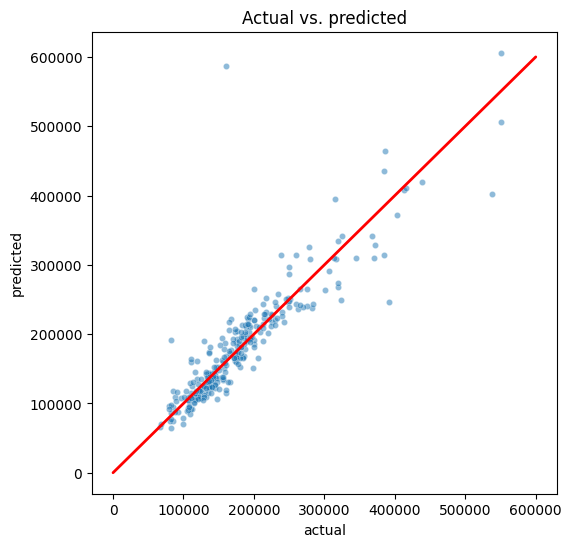

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,600000], [0,600000], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Linear relationship between actual and residuals

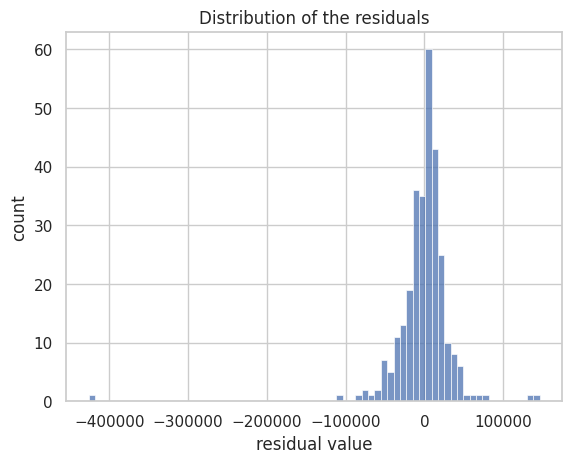

In [88]:
sns.histplot(results['residual']) #bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

Normality of distributed residuals

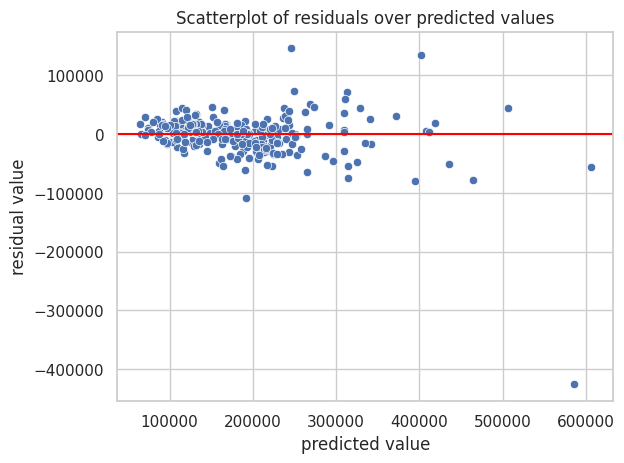

In [89]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [90]:
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [91]:
len(df_test['PoolQC'])

1459

In [92]:
# PoolQC : data description says NA means no pool
df_test.loc[:, "PoolQC"] = df_test.loc[:, "PoolQC"].fillna("None")
# MiscFeature : NA most likely means no noteworthy feature
df_test.loc[:, "MiscFeature"] = df_test.loc[:, "MiscFeature"].fillna("None")
# Alley : NA most likely means no Alley
df_test.loc[:, "Alley"] = df_test.loc[:, "Alley"].fillna("None")
# No fence
df_test.loc[:, "Fence"] = df_test.loc[:, "Fence"].fillna("None")
# No veneer on masonry
df_test.loc[:, "MasVnrType"] = df_test.loc[:, "MasVnrType"].fillna("None")
# No fire place
df_test.loc[:, "FireplaceQu"] = df_test.loc[:, "FireplaceQu"].fillna("No")
# No frontage ft or m
df_test.loc[:, "LotFrontage"] = df_test.loc[:, "LotFrontage"].fillna(0)
# GarageType etc : data description says NA for garage features is "no garage"
df_test.loc[:, "GarageType"] = df_test.loc[:, "GarageType"].fillna("No")
df_test.loc[:, "GarageFinish"] = df_test.loc[:, "GarageFinish"].fillna("No")
df_test.loc[:, "GarageQual"] = df_test.loc[:, "GarageQual"].fillna("No")
df_test.loc[:, "GarageCond"] = df_test.loc[:, "GarageCond"].fillna("No")
df_test.loc[:, "GarageArea"] = df_test.loc[:, "GarageArea"].fillna(0)
df_test.loc[:, "GarageCars"] = df_test.loc[:, "GarageCars"].fillna(0)
df_test.loc[:, "GarageYrBlt"] = df_test.loc[:, "GarageYrBlt"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
df_test.loc[:, "BsmtQual"] = df_test.loc[:, "BsmtQual"].fillna("No")
df_test.loc[:, "BsmtCond"] = df_test.loc[:, "BsmtCond"].fillna("No")
df_test.loc[:, "BsmtExposure"] = df_test.loc[:, "BsmtExposure"].fillna("No")
df_test.loc[:, "BsmtFinType1"] = df_test.loc[:, "BsmtFinType1"].fillna("No")
df_test.loc[:, "BsmtFinType2"] = df_test.loc[:, "BsmtFinType2"].fillna("No")
# No veneer area
df_test.loc[:, "MasVnrArea"] = df_test.loc[:, "MasVnrArea"].fillna(0)
#misc feature value
df_test.loc[:, "MiscVal"] = df_test.loc[:, "MiscVal"].fillna(0)
#kitchen quality
df_test.loc[:, 'KitchenQual'] = df_test.loc[:, 'KitchenQual'].fillna("Fa")


In [93]:
df_test['PoolQC_B'] = np.where(df_test['PoolQC']=='None', 0, 1)

df_test['MiscFeature_B'] = np.where(df_test['MiscFeature']=='None', 0, 1)

df_test['Alley_B'] = np.where(df_test['Alley']=='None', 0, 1)

df_test['Fence_B'] = np.where(df_test['Fence']=='None', 0, 1)

df_test['MasVnrType_B'] = np.where(df_test['MasVnrType']=='None', 0, 1)

df_test['GarageQual_B'] = np.where(df_test['MasVnrType']=='No', 0, 1)

df_test['BsmtQual_B'] = np.where(df_test['MasVnrType']=='No', 0, 1)

In [94]:
df_test=df_test.replace({"MSZoning" : {"FV" : 4, "RL" : 3, 'RH': 2, 'RM':2, 'C(all)':1},
                       "LotConfig" : {"CulDSac" : 1, "FR3" : 1, "FR2" : 2, "Corner" : 2, "Inside" : 2},
                       "Neighborhood" : {"NridgHt" : 3, "NoRidge" : 3, "StoneBr": 3, "Timber" : 2,  "Somerst" : 2, "Veenker": 2, "Crawfor" : 2, "ClearCr" : 2, "CollgCr": 2, 
                                         "Blmngtn" : 2, "NWAmes" : 2, "Gilbert": 2, "SawyerW" : 2, "Mitchel" : 1, "NPkVill": 1, 
                                         "NAmes" : 1, "SWISU" : 1, "Blueste": 1, "Sawyer" : 1, "BrkSide" : 1, "Edwards": 1, "OldTown" : 1,
                                         "BrDale" : 1, "IDOTRR": 1, "MeadowV" : 1},
                       "Condition2" : {"PosA" : 3, "PosN" : 3, "RRAe": 2, "Norm" : 2, "RRAn" : 1, 
                                         "Feedr" : 1, "Artery" : 1, "RRNn" : 1},
                       "BsmtFinType2" : {"Unf" : 2, "LwQ": 2, "Rec" : 1, "BLQ" : 1, 
                                         "ALQ" : 2, "GLQ" : 3},
                       "BldgType" : {"TwnhsE" : 2, "1Fam" : 2, "Twnhs" : 1, "Duplex": 1, "2fmCon" : 1},
                       "Foundation" : {"PConc" : 3, "Wood" : 2, "CBlock": 2, "Stone": 2, "BrkTil": 2, "Slab" : 1},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA": 2, "Gd": 2, "Ex" : 3},
                       "SaleType" : {"Con" : 0, "New" : 1, "CWD" : 2, "WD": 3, "ConLw" : 4, "ConLD" : 5 ,
                                     "ConLI": 3, "COD" : 4, "Oth" : 5},
                       "SaleCondition" : {"Partial" : 1, "Normal" : 2, "Alloca": 3, "Family": 4, "Abnorml" : 5 , "AdjLand" : 5},
                       "CentralAir" : {"Y" : 2, "N" : 1},
                       "FireplaceQu" : {"No" : 1,"Po" : 1, "Fa" : 1, "TA" : 1, "Gd" : 1, "Ex" : 2},
                       "MasVnrType" : {"Stone" : 3, "BrkFace" : 2, "BrkCmn" : 1, "None" : 1},
                       "MiscFeature" : {"TenC" : 3, "Gar2" : 2, "None" : 2, "Shed" : 2, "Othr": 1},
                       "Electrical" : {"SBrkr" : 1, "FuseA" : 2, "FuseF" : 3, "FuseP" : 4, "Mix": 5}}
                     )

In [95]:
df_test = df_test.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}}
                     )

In [96]:
df_test["OverallScore"] = df_test["OverallQual"] * df_test["OverallCond"]

df_test["ExterScore"] = df_test["ExterQual"] * df_test["ExterCond"]

df_test["BsmtScore"] = df_test["BsmtQual"] * df_test["BsmtCond"]

df_test["FlrSF"] = df_test["1stFlrSF"] + df_test["2ndFlrSF"]

df_test["GarageScore"] = df_test["GarageQual"] * df_test["GarageCond"]

df_test["LivSF"] = df_test["GrLivArea"] + df_test["TotalBsmtSF"]

df_test["Exteroverall"] = df_test["ExterQual"] * df_test["OverallCond"]

df_test["AddedScore"] = df_test["BsmtQual"] * df_test["GarageQual"]

In [97]:
# binning continuous variables into buckets based on quantiles
df_test['AgeBldg'] = pd.qcut(df_test['YearBuilt'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Ancient', 'Vintage', 'Old', 'Average', 'New'])

df_test['LastRemod']= 2010 - df_test['YearRemodAdd']

df_test['StateRemod'] = pd.qcut(df_test['LastRemod'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Critical', 'Due', 'Partial', 'Optimal', 'Newly Remod'])

df_test['LotFrontageRn'] = pd.qcut(df_test['LotFrontage'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Little', 'Fair', 'Adequate', 'Good', 'Excellent'])

df_test['LotAreaRn'] = pd.qcut(df_test['LotArea'], q=[0, .2, .4, .6, .8, 1], 
                             labels=['Little', 'Fair', 'Adequate', 'Good', 'Excellent'])

In [98]:
df_test['MasVnrCov']= pd.cut(df_test['MasVnrArea'], bins=[-1, 400, 800, 1200, 1601], 
                             labels=['Small', 'Sizeable', 'Optimal', 'Excellent'])

df_test['MiscValRn'] = pd.cut(df_test['MiscVal'], bins=[-1, 100, 1000, 5000, 15501], 
                             labels=['Not Valuable', 'Fair', 'Good', 'Great'])


In [99]:
cat_var = df_test.select_dtypes(exclude=np.number).columns
num_var = df_test.select_dtypes(include=np.number).columns

df_num=df_test[num_var]
df_cat=df_test[cat_var]

In [100]:
df_num.isna().sum()

Id              0
MSSubClass      0
LotFrontage     0
LotArea         0
LotConfig       0
               ..
GarageScore     0
LivSF           1
Exteroverall    0
AddedScore      0
LastRemod       0
Length: 72, dtype: int64

In [101]:
purge3 = ['LivSF', 'OverallQual', 'FlrSF', 'Neighborhood',
       'GrLivArea', 'AddedScore']

In [102]:

df2_cat= df_cat[purge2]
df2_num= df_num[purge3]

In [103]:
skewness = df2_num.skew(axis=0)
skewness = skewness[abs(skewness) > 0.5 ]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df2_num[skewed_features] = np.log1p(df2_num[skewed_features])

5 skewed numerical features to log transform


In [104]:
df_full = pd.concat([df2_cat, df2_num], axis=1)

In [105]:

df_full[['LivSF']] = df_full[['LivSF']].fillna(0)

In [106]:
df_full.isna().sum()

KitchenQual     0
GarageFinish    0
AgeBldg         0
StateRemod      0
LotAreaRn       0
GarageType      0
LivSF           0
OverallQual     0
FlrSF           0
Neighborhood    0
GrLivArea       0
AddedScore      0
dtype: int64

In [107]:
df = df_full.copy()

In [108]:
df=pd.get_dummies(df, drop_first=False)

In [109]:


X_work = df

In [110]:
X_poly1=  poly.transform(X_work)

In [111]:

SalePrice = grid_search.best_estimator_.predict(X_poly1)


In [112]:

SalePrice = np.expm1(SalePrice)
SalePrice

array([118769.83273843, 177389.1158332 , 183165.18594731, ...,
       152239.81295437, 115061.88968194, 190485.7838479 ])

In [113]:
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': SalePrice})

# If the 'Id' column is your index, you can reset it as follows:
submission.reset_index(drop=True, inplace=True)
submission.to_csv('sample_submission.csv',index = False)
submission

,Id,SalePrice
0,1461,118769.832738
1,1462,177389.115833
2,1463,183165.185947
3,1464,187909.059993
4,1465,205058.369613
...,...,...
1454,2915,87918.336071
1455,2916,95944.612300
1456,2917,152239.812954
1457,2918,115061.889682


I found this  [notebook](http://https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook) to be very helpful